<a href="https://colab.research.google.com/github/Balaji507/Leaf-disease-detection/blob/main/2_Cotton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==1.0.0-beta0

import keras.utils as image
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow 
import keras
from tensorflow.keras.models import Model as model

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
classification_result='cotton'

In [ ]:
if classification_result=='corn and maize':
  train_path="/content/drive/MyDrive/Datasets/Corn_and_Maize/train"
  test_path="/content/drive/MyDrive/Datasets/Corn_and_Maize/test"
  det_dictionary = {0: "blight", 1: "common rust", 2: "gray leaf spot", 3: "healthy"}
  
elif classification_result=='cotton':
  train_path="/content/drive/MyDrive/Datasets/Cotton/train"
  test_path="/content/drive/MyDrive/Datasets/Cotton/test"
  det_dictionary = {0: "Black root rot", 1: "Lint contamination", 2: "Healthy", 3: "Healthy"}

elif classification_result=='grape':
  train_path="/content/drive/MyDrive/Datasets/Grape/train"
  test_path="/content/drive/MyDrive/Datasets/Grape/test"
  det_dictionary = {0: "Black rot(grape)", 1: "Grape Esca (Black Measles)", 2: "healthy", 3: "leaf blight (Isariopsis Leaf Spot)"}

elif classification_result=='potato':
  train_path="/content/drive/MyDrive/Datasets/Potato/Train"
  test_path="/content/drive/MyDrive/Datasets/Potato/Test"
  det_dictionary = {0: "Early blight", 1: "Late blight", 2: "Healthy"}

elif classification_result=='tomato':
  train_path="/content/drive/MyDrive/Datasets/Tomato/train"
  test_path="/content/drive/MyDrive/Datasets/Tomato/test"
  det_dictionary = {0: "bacterial spot", 1: "Early Blight", 2: "Healthy", 3: "Late Blight", 4: "Leaf Mold", 5: "Septoria leaf spot", 6: "Spider mites", 7: "Target spot", 8: "Mosaic virus", 9: "Yellow leaf curl virus"}

In [ ]:
trdata = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

tsdata = ImageDataGenerator(rescale = 1./255)
traindata = trdata.flow_from_directory(directory=train_path,target_size=(256,256),batch_size = 15,class_mode = 'categorical')
testdata = tsdata.flow_from_directory(directory=test_path, target_size=(256,256),batch_size = 15,class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [ ]:
num_classes=len(traindata.class_indices)
print(num_classes)

4


In [ ]:
# from keras.applications.vgg16 import VGG16
# model_d=VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3)) 
# preds=Dense(num_classes,activation='softmax')(x)
# import tensorflow as tf
# model_d = tf.keras.models.Sequential([
#     # This is the first convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256,256, 3)),
#     # This is the second convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
#     # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('No')
#     # and 1 for the other ('Yes')
#     tf.keras.layers.Dense(1, activation='softmax')
# ])

# ----------------------------------------------------------------------------------------------

# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(256,256,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes))

# x=model.output
# preds=Dense(num_classes,activation='softmax')(x)

# ------------------------------------------------------------------------------------------

# model = Sequential()
# model.add(Conv2D(64, (3, 3), input_shape=(256,256,3)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, (3, 3)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (3, 3)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
history = model.fit_generator(traindata,epochs=20,validation_data=testdata)

Epoch 1/20
131/131 [==============================] - 560s 4s/step - loss: 1.1021 - accuracy: 0.5156 - val_loss: 0.7797 - val_accuracy: 0.6792
Epoch 2/20
131/131 [==============================] - 292s 2s/step - loss: 0.7779 - accuracy: 0.6920 - val_loss: 0.4970 - val_accuracy: 0.8113
Epoch 3/20
131/131 [==============================] - 296s 2s/step - loss: 0.6215 - accuracy: 0.7550 - val_loss: 0.6745 - val_accuracy: 0.7358
Epoch 4/20
131/131 [==============================] - 298s 2s/step - loss: 0.5447 - accuracy: 0.7770 - val_loss: 0.5191 - val_accuracy: 0.7925
Epoch 5/20
131/131 [==============================] - 298s 2s/step - loss: 0.4425 - accuracy: 0.8247 - val_loss: 0.5686 - val_accuracy: 0.7642
Epoch 6/20
131/131 [==============================] - 296s 2s/step - loss: 0.3875 - accuracy: 0.8421 - val_loss: 0.2452 - val_accuracy: 0.9057
Epoch 7/20
131/131 [==============================] - 300s 2s/step - loss: 0.3796 - accuracy: 0.8514 - val_loss: 0.3289 - val_accuracy: 0.8868

In [ ]:
model.save("/content/drive/MyDrive/Model_Save/cotton.h5")

In [ ]:
from keras.models import load_model
classifier=load_model("/content/drive/MyDrive/Model_Save/cotton.h5")

In [ ]:
img = image.load_img('/content/drive/MyDrive/Datasets/Cotton/test/fresh cotton leaf/d (198)_iaip.jpg', target_size=(256,256))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
x = x / 255.
predictions = classifier.predict(x)
class_index = predictions
class_index1 = np.argmax(predictions)
print(class_index)
detection_result = (det_dictionary[class_index1])
print(detection_result)

1/1 [==============================] - 0s 473ms/step
[[2.36863940e-04 4.77265392e-04 9.99185622e-01 1.00317564e-04]]
Healthy


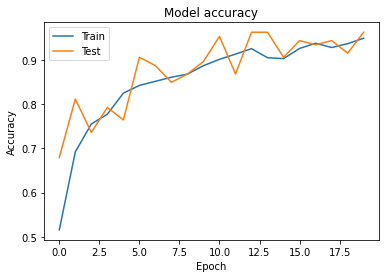

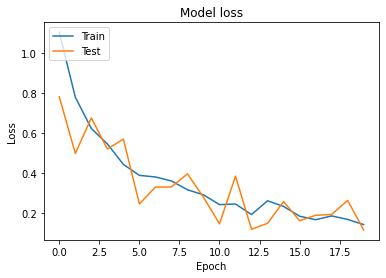

In [ ]:
-----------------import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()